<h2 style="color:blue;">Imported Libraries</h2>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
plt.rcParams['figure.figsize'] = 8, 6
plt.style.use('ggplot')

<h2 style="color:blue;">Data</h2>

In [6]:
df=pd.read_csv('../Raja/resources/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


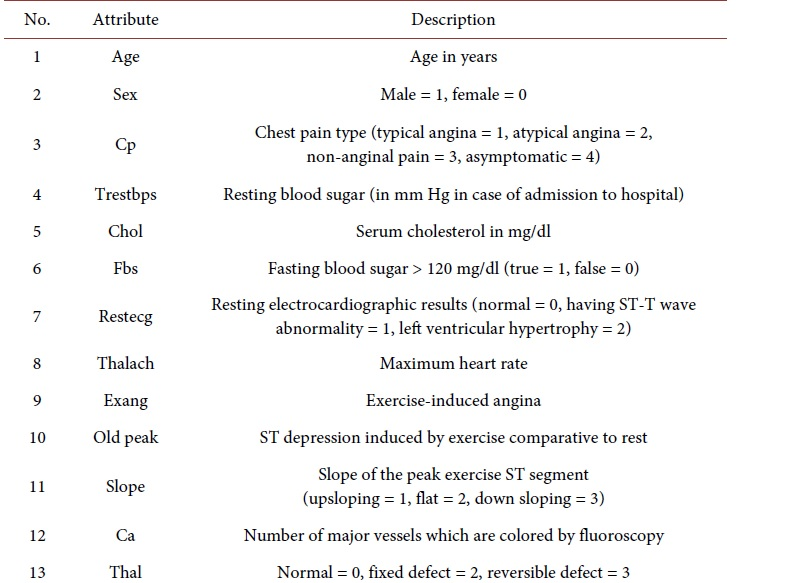

In [1]:
from IPython.display import Image
Image(filename="C:/Users/Raja/resources/heart_des.png")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
X = df.drop(['target'], axis=1)
y = df['target']

In [11]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
df.groupby('sex')['target'].value_counts().unstack()

target,0,1
sex,,
0,24,72
1,114,93


In [13]:
df['age_type'] = pd.cut(df['age'], bins=[25, 35, 45, 55, 65, 75, 85], labels=['25-35','35-45', '45-55', '55-65','65-75','75-85'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_type
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,55-65
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,35-45
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,35-45
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,55-65
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,55-65


In [14]:
df.shape

(303, 15)

In [15]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<h2 style="color:blue;">Plots</h2>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256C523CBE0>,
      dtype=object)

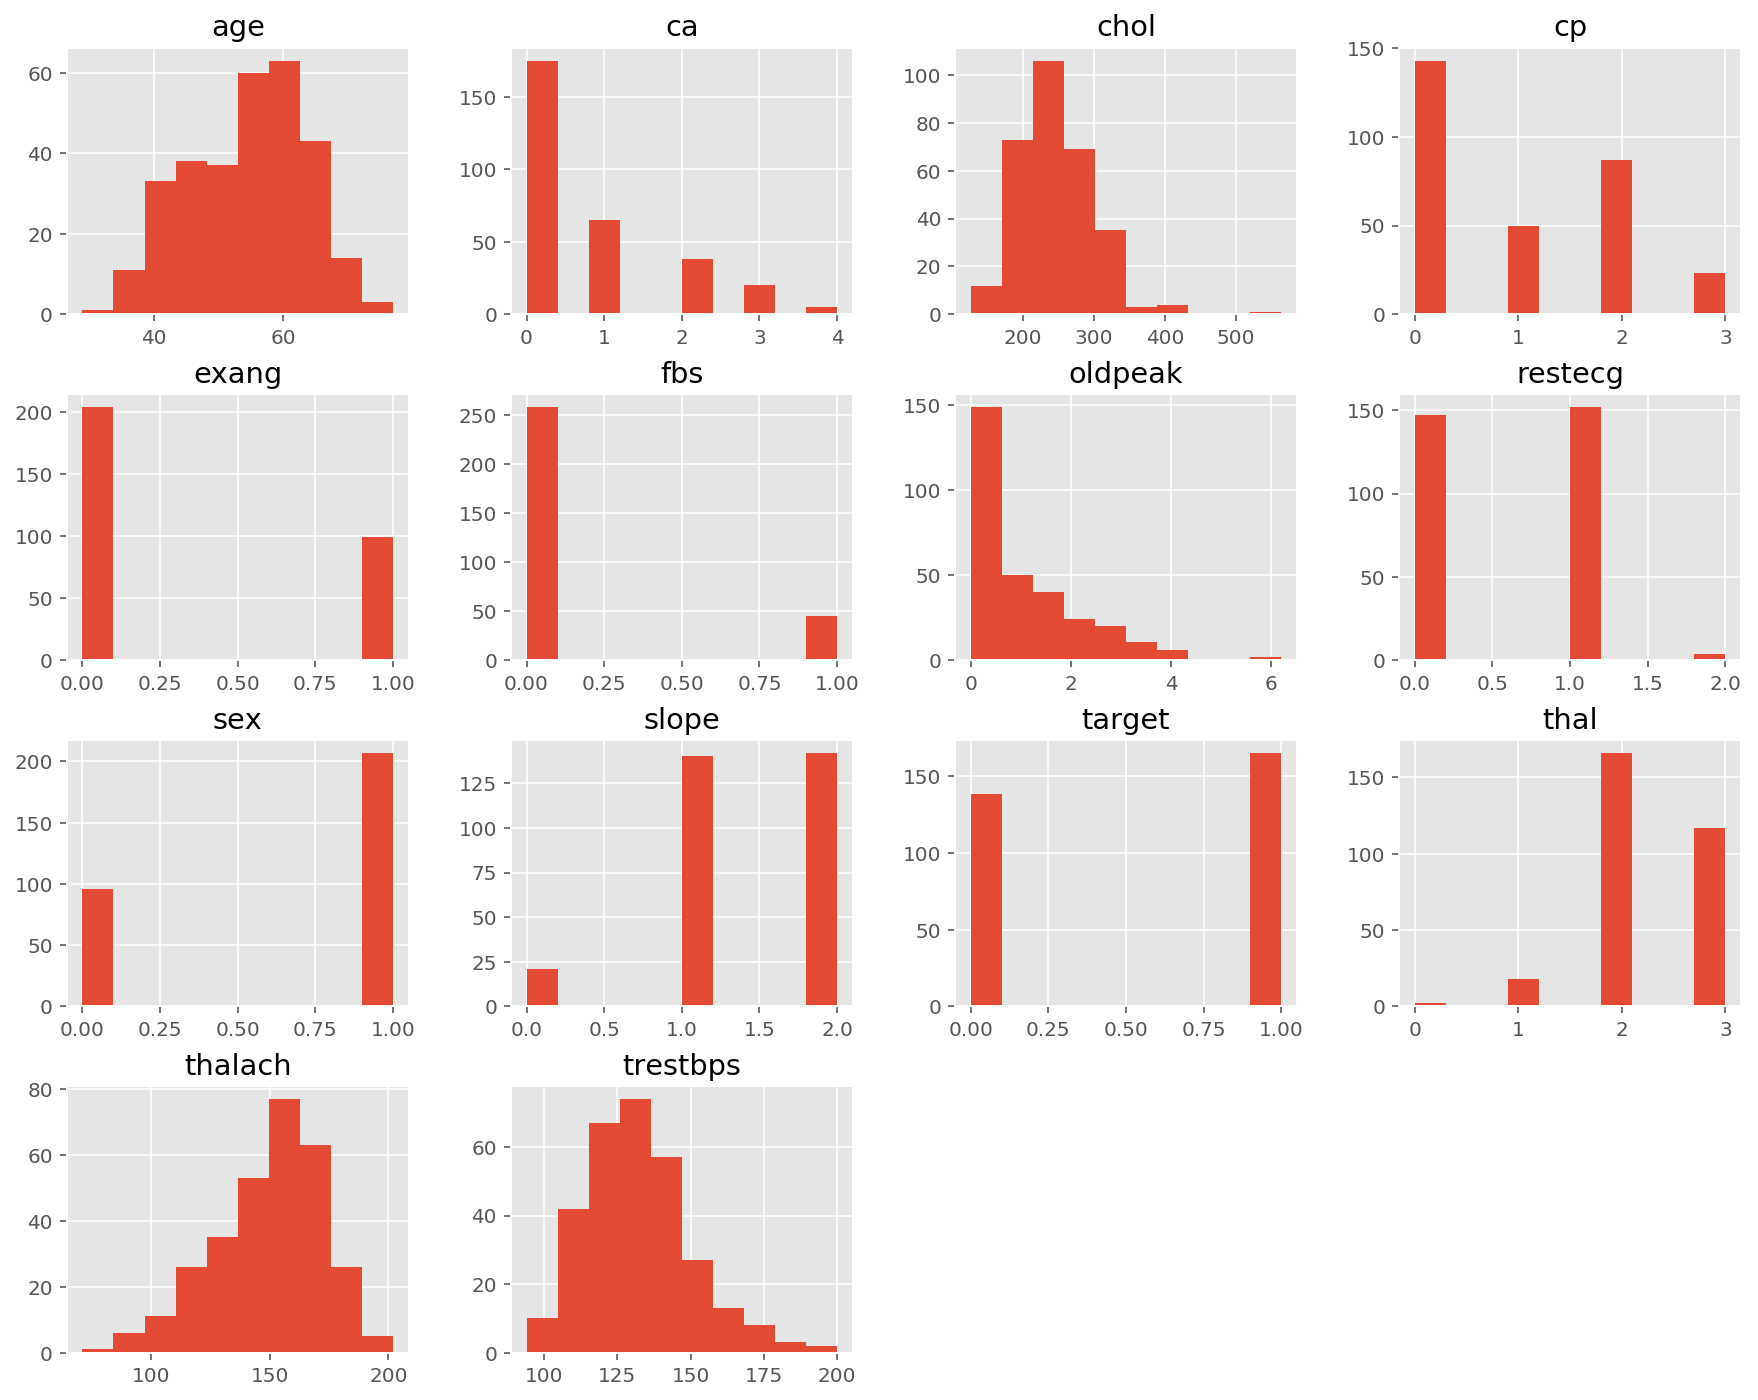

In [16]:
df.hist(figsize=(15,12))

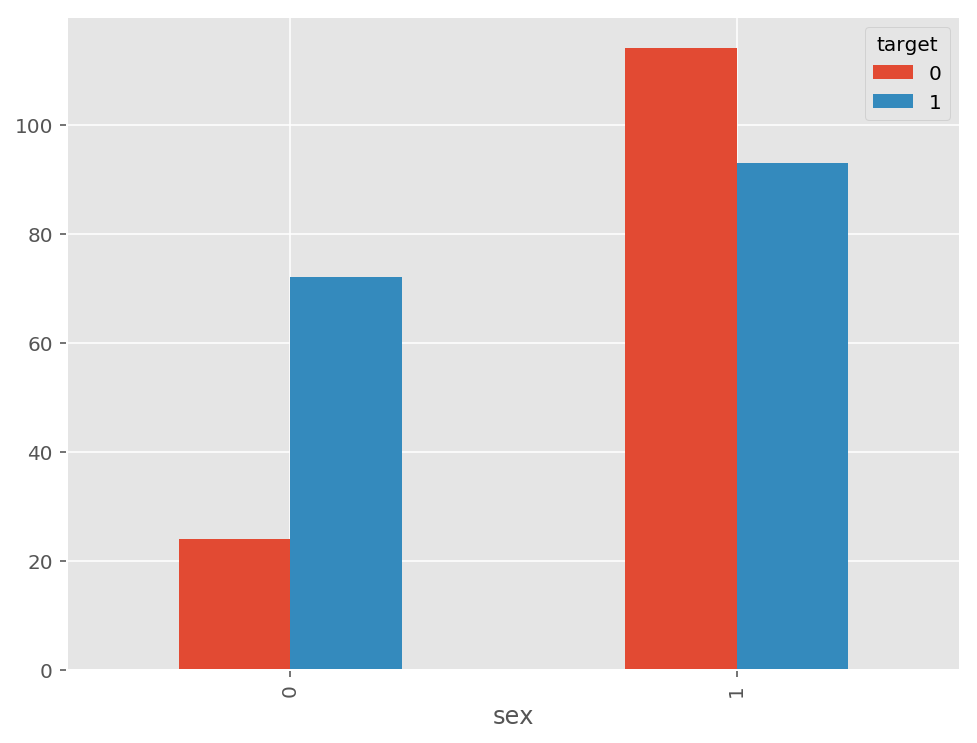

In [17]:
df.groupby('sex')['target'].value_counts().unstack().plot.bar()

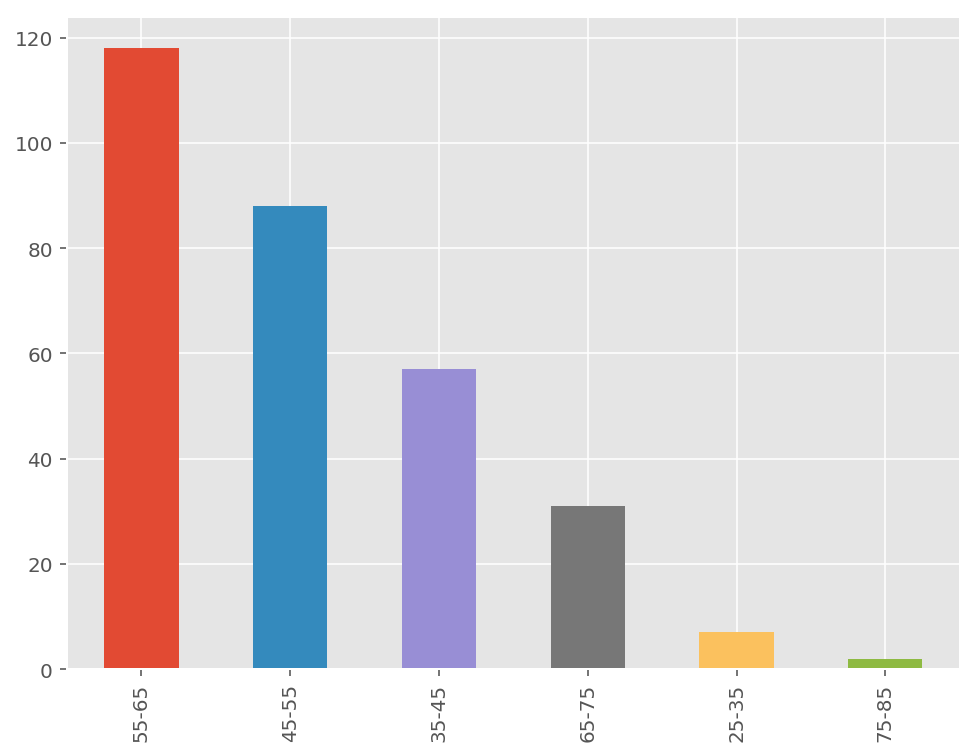

In [18]:
df['age_type'].value_counts().plot.bar()

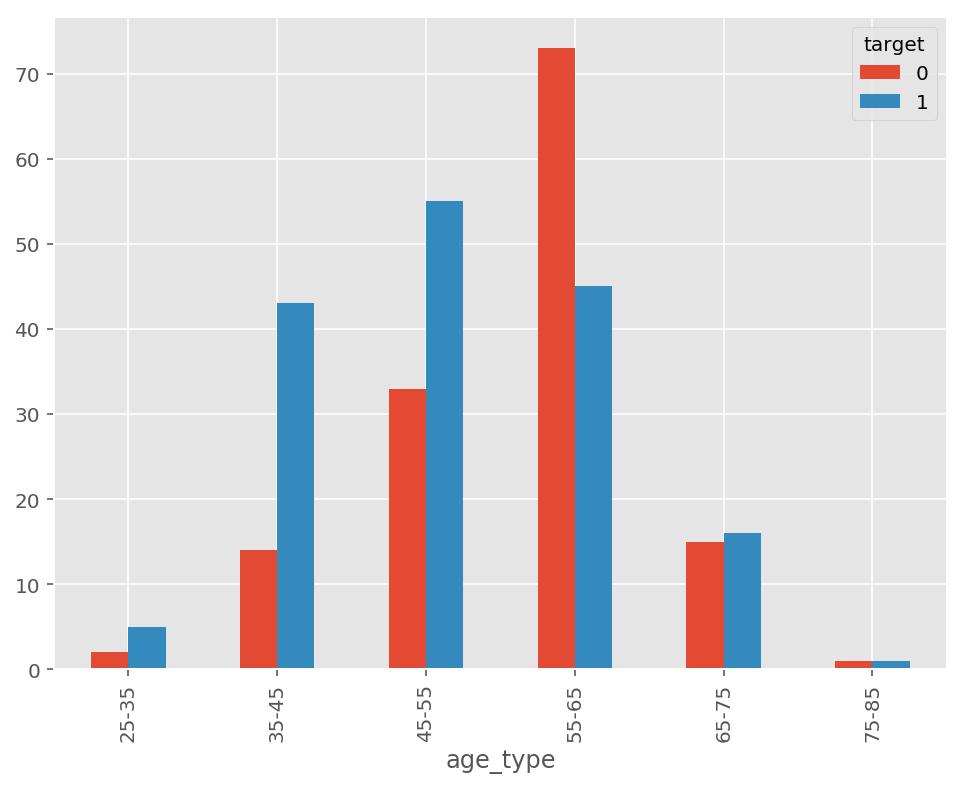

In [19]:
df.groupby('age_type')['target'].value_counts().unstack().plot.bar()

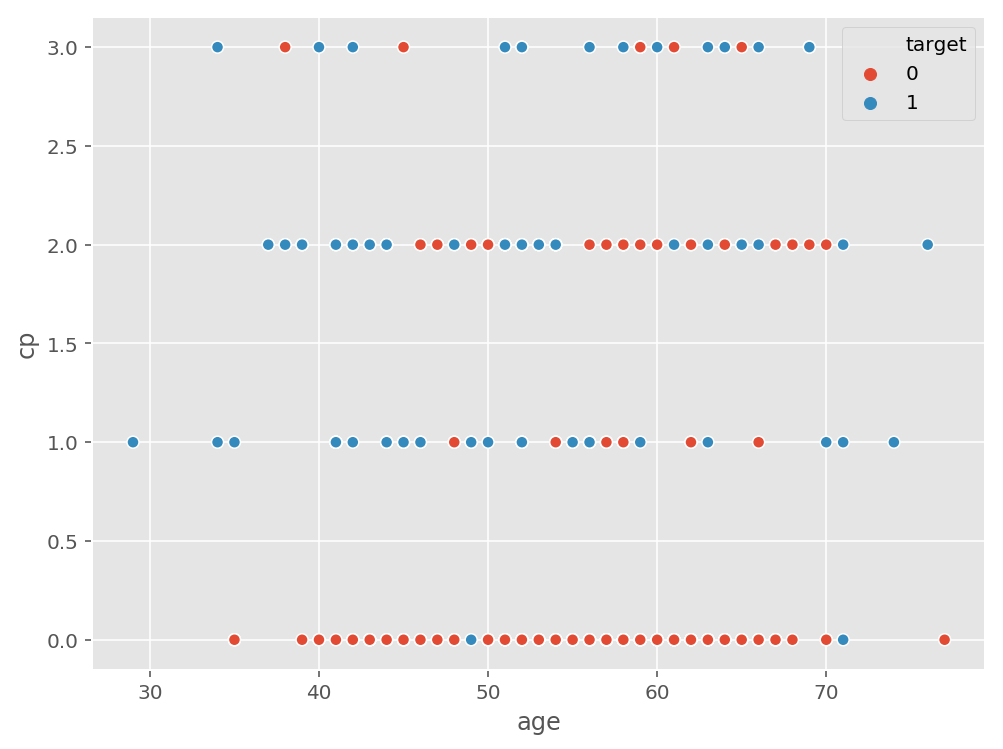

In [20]:
sns.scatterplot(x='age', y='cp', hue='target', data=df)

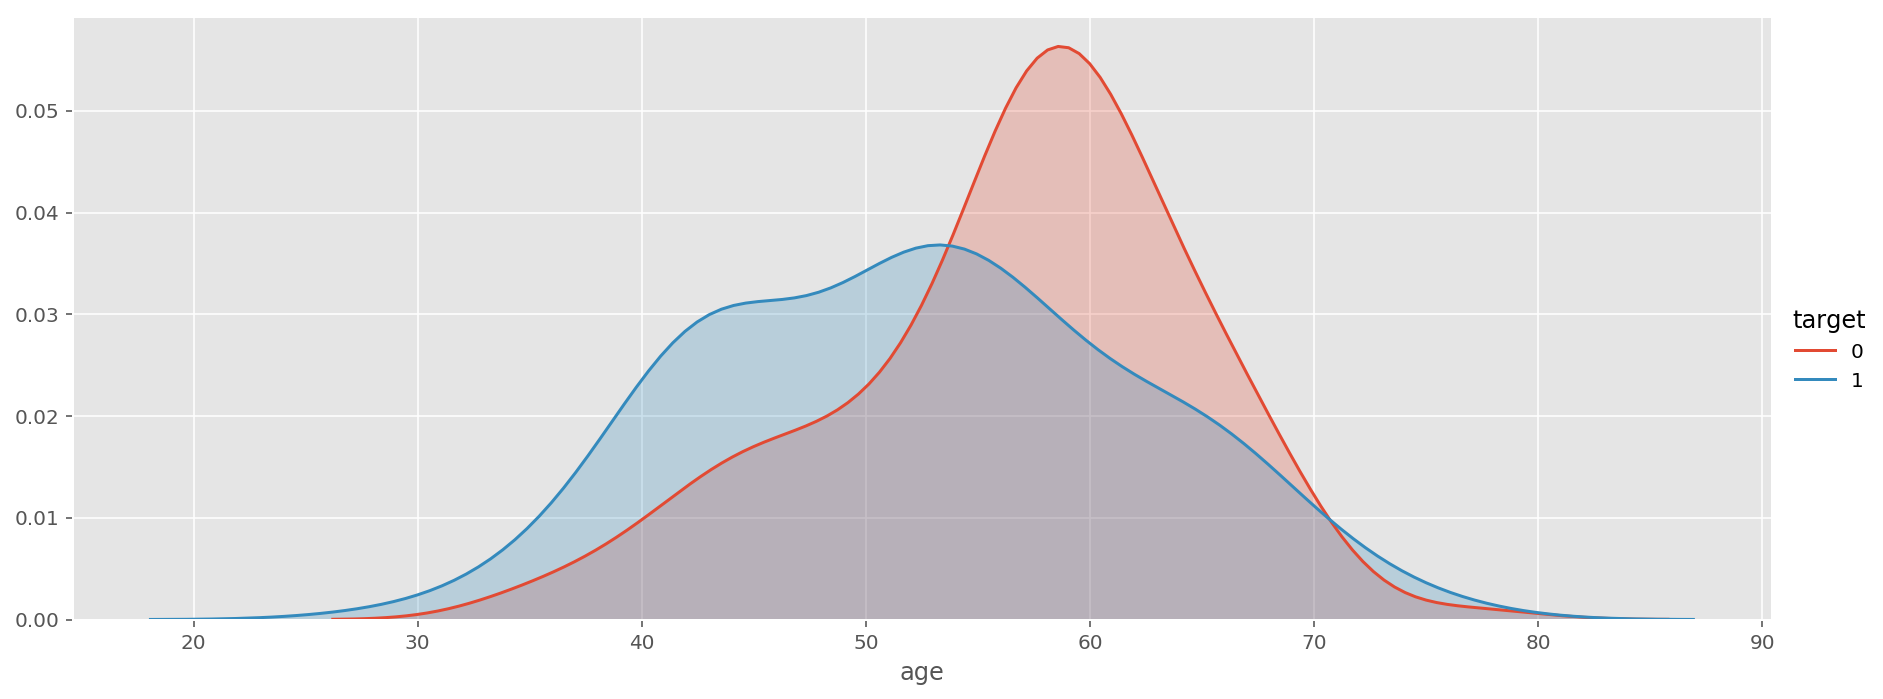

In [21]:
fg = sns.FacetGrid(df, hue='target', height=5, aspect=2.5)
fg.map(sns.kdeplot, 'age', shade=True).add_legend()

 <h2 style="color:blue;">Correlation</h2>

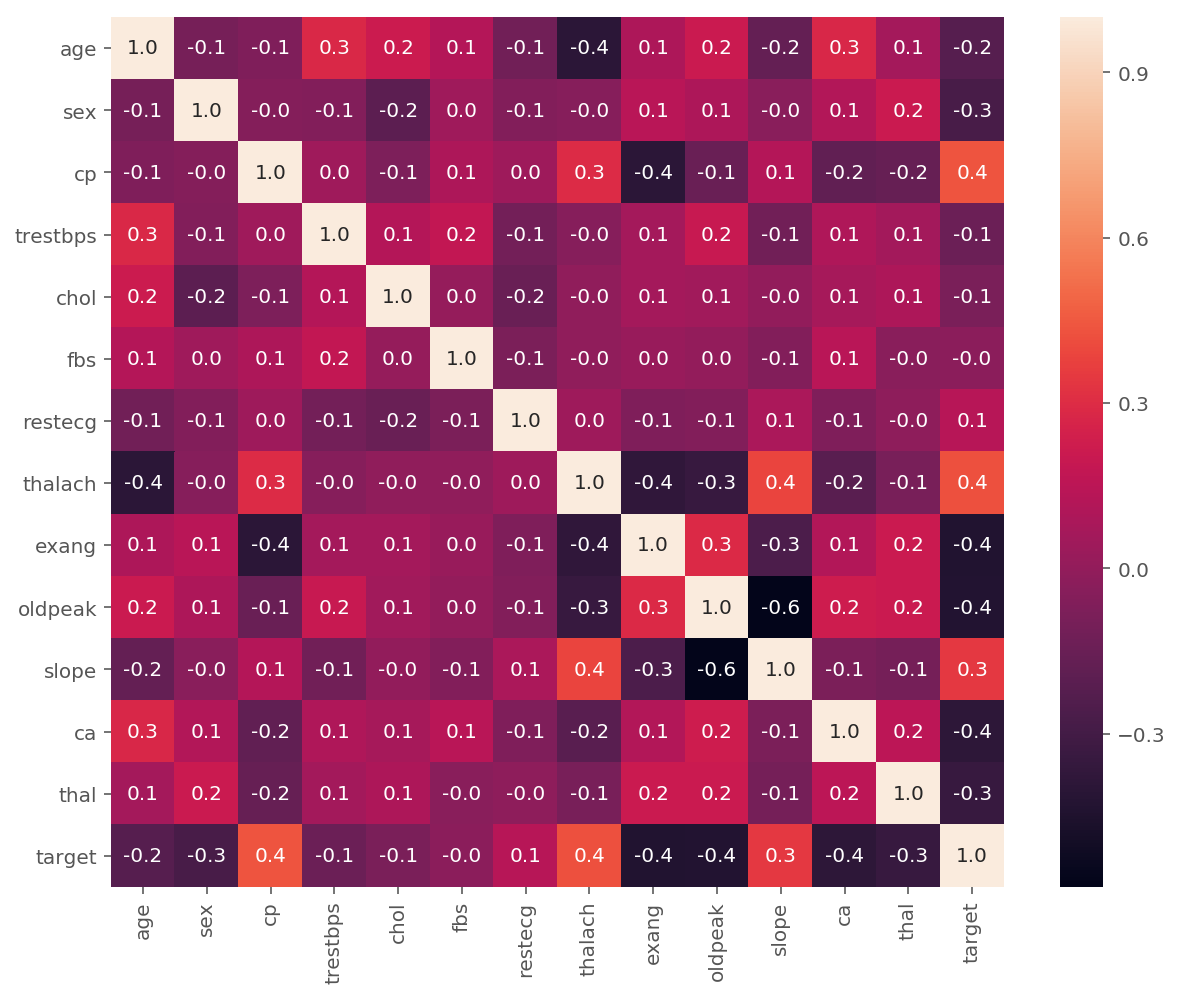

In [22]:
plt.subplots(figsize=(10,8))  # adjust figure size
sns.heatmap(df.corr(), annot=True, fmt='.1f')

<h2> Model

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=0)

In [24]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

print('Train accuracy: {}'.format(tree.score(X_train, y_train)))
print('Test accuracy: {}'.format(tree.score(X_test, y_test)))

Train accuracy: 0.8429752066115702
Test accuracy: 0.819672131147541


In [25]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, max_depth=3)  # n_estimators is the number of decision trees
forest.fit(X_train, y_train)

print('Train accuracy: {}'.format(forest.score(X_train, y_train)))
print('Test accuracy: {}'.format(forest.score(X_test, y_test)))

Train accuracy: 0.8636363636363636
Test accuracy: 0.8524590163934426


In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Train accuracy: {}'.format(lr.score(X_train, y_train)))
print('Test accuracy: {}'.format(lr.score(X_test, y_test)))

Train accuracy: 0.8471074380165289
Test accuracy: 0.8524590163934426


In [27]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

print('Train accuracy: {}'.format(svm_linear.score(X_train, y_train)))
print('Test accuracy: {}'.format(svm_linear.score(X_test, y_test)))

Train accuracy: 0.8471074380165289
Test accuracy: 0.819672131147541


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(df.drop(['target','age_type'], 1),y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [30]:
model_svm_cv = svm.SVC(kernel='linear', C=1)
accuracy = cross_val_score(model_svm_cv,X,y, cv=4)

In [31]:
accuracy.mean()

0.8315641376167693

In [32]:
model_log=LogisticRegression()
accuracy = cross_val_score(model_log,X,y, cv=4)
accuracy.mean()

0.8216068580542265

 <h2 style="color:blue;">Confusion Matrix</h2>

Text(0.5, 33.0, 'Predicted Label')

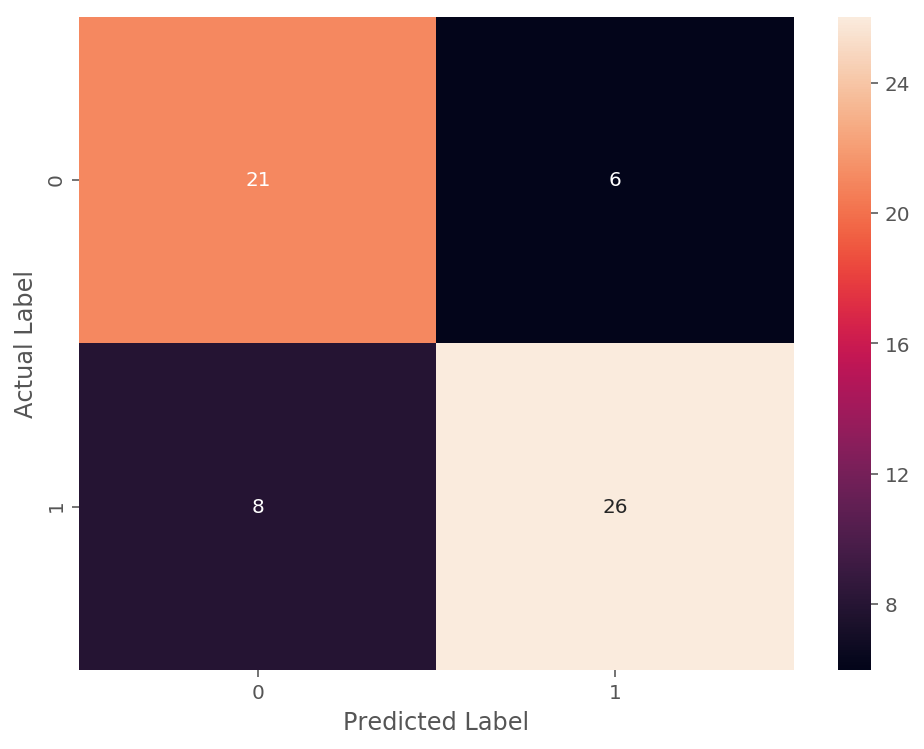

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

ytrain_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

              precision    recall  f1-score   support

  No-disease       0.90      0.77      0.83       138
     Disease       0.83      0.93      0.87       165

   micro avg       0.85      0.85      0.85       303
   macro avg       0.86      0.85      0.85       303
weighted avg       0.86      0.85      0.85       303



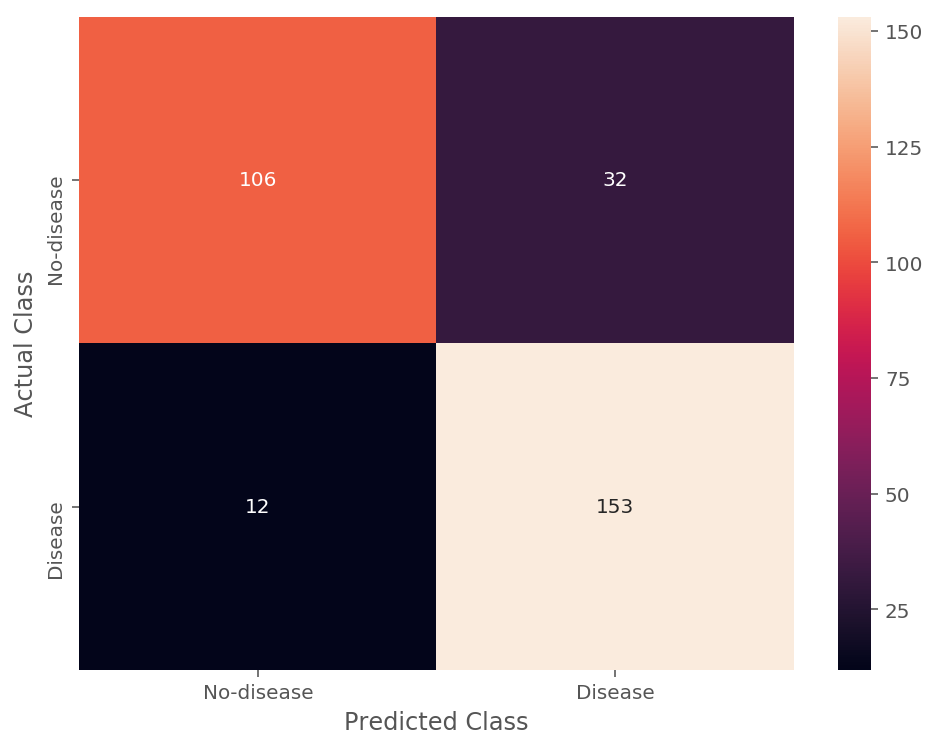

In [34]:
clf = SVC(kernel='linear', C=1).fit(X, y)
y_pred = clf.predict(X)
labels = {'No-disease':0, 'Disease':1}
print(classification_report(y, clf.predict(X), target_names=list(labels)))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, xticklabels=labels, yticklabels=labels, fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [35]:
# Saving the model
import pickle
with open('forest.pkl', 'wb') as file:
    pickle.dump(forest, file)

In [36]:
with open('forest.pkl', 'rb') as file:
    model_forest=pickle.load(file)

In [37]:
model_forest.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

array([1], dtype=int64)